In [40]:
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [44]:
# reflect an existing database into a new model
db = automap_base()
# reflect the tables
db.prepare(engine, reflect=True)

C:\Users\juant\AppData\Local\Temp\ipykernel_10900\361630663.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  db.prepare(engine, reflect=True)


In [45]:
# View all of the classes that automap found
db.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
measurement = db.classes.measurement
station = db.classes.station

In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date[0])

2017-08-23


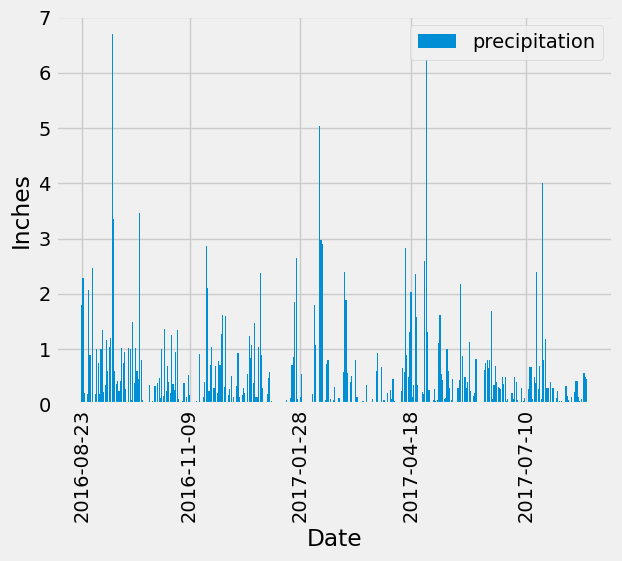

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_rain = session.query(func.max(measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
year_rain = session.query(measurement.date,func.max(measurement.prcp)).filter(func.strftime('%Y-%m-%d',measurement.date) > one_year).group_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(year_rain, columns=['Date', 'Inches'])

# Sort the dataframe by date
sorted_rain = rain_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(sorted_rain.index, sorted_rain['Inches'])
plt.legend(['precipitation'])
selected_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
selected_indices = sorted_rain.index[sorted_rain['Date'].isin(selected_dates)].tolist()
plt.xticks(selected_indices, selected_dates, rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
all_rain = session.query(measurement.date,(measurement.prcp))
all_rain_df = pd.DataFrame(all_rain, columns=['Date', 'Inches'])
all_rain_df.describe()

,Inches
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station).count()
stations

9

In [61]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519281 = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
most_active = session.query(*USC00519281).filter(measurement.station=='USC00519281').all()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

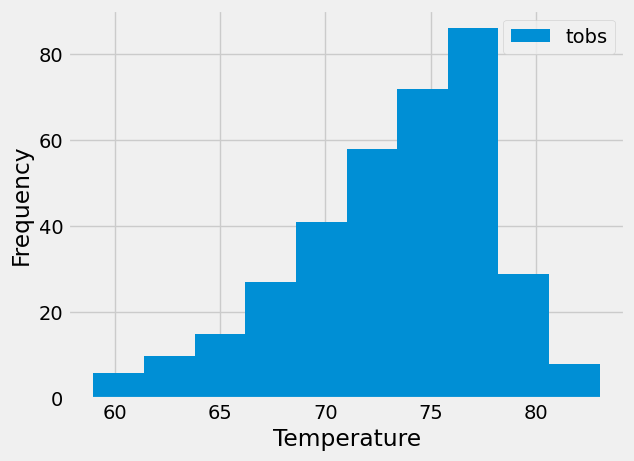

In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_year = session.query(measurement.date, measurement.tobs).filter(func.strftime(measurement.date) > one_year).filter(measurement.station=='USC00519281').all()
USC00519281_year_df = pd.DataFrame(USC00519281_year)
USC00519281_year_df.set_index('date', inplace=True)

plt.hist(USC00519281_year_df['tobs'])
plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [70]:
# Close Session
session.close()